<b>Software Bug Prediction </b><br>is an important
issue in software development and maintenance processes, which
concerns with the overall of software successes. This is because
predicting the software faults in earlier phase improves the
software quality, reliability, efficiency and reduces the software
cost.<br>
Proposed approach is to predict the likelihood of a bug in the software module based on software metrics so that developer or tester can prioritize their work which improves efficiency and saves time

### Approach: <br>
1. Taken NASA datasets of software bug prediction which consists of number of lines of code, comments, blank space , HALSTEAD FEATURES, MCCABE CYCLOMATIC COMPLEXITY, defects
2. Combine the datasets for more data
3. Understand the features in the dataset and also clean and  preprocess the data.
4. Derived a  evaluation criteria by a Ruled based approach using Halstead features and it is added   as a feature to the data.
5. Feature selection: input matrix X and output vector Y.
6. Drop insignificant features from the data
7. Applied SMOTE to the data to solve class imbalanced distribution problem
8. Split the data for training and testing
9. Apply PCA (Dimensionality Reduction Algorithm) to the input features to reduce dimensionality curse.
10. Define AI models i.e SVM , random forest , decision tree, neural networks etc.
11. Train the models
12. Check performance such as Accuracy, recall ,f1 score, roc auc metrics.
13. Extract software features of each module in the directory using Radon package
14. We take all required features of each module in a list
15. We apply scaling and dimensionality reduction to the features.
16. AI model can predict whether the module is clean or likely to be buggy.
17. Based on results, developer or tester can prioritize their work and can check the modules that predicted to be buggy which saves time.


### File operations

In [1]:
!git clone https://github.com/PrudhviGNV/Bug-Prediction-dataset.git

Cloning into 'Bug-Prediction-dataset'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [3]:
ls

Bug-Prediction-dataset/  sample_data/


In [4]:
cd Bug-Prediction-dataset/

/content/Bug-Prediction-dataset


In [5]:
ls

cm1.csv  kc1.csv  pc1.csv    soft_def_1.csv  soft_def_JM1.csv
jm1.csv  kc2.csv  README.md  soft_def_2.csv


### Data processing

In [6]:
import pandas as pd
import numpy as np


In [7]:
df1 = pd.read_csv('soft_def_1.csv')

In [8]:
df2 = pd.read_csv('soft_def_2.csv')

In [9]:
df3 = pd.read_csv('soft_def_JM1.csv')

In [10]:
frames = [df1, df2,df3]

In [11]:
data = pd.concat(frames)

In [ ]:
"""data= pd.DataFrame()
for col  in d:
  n = d[col].values
  
  data[col] = n
  
  """

In [12]:
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,1,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15,15,44,19,9,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16,8,31,16,7,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16,12,46,26,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,0.08,98.38,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,0.04,59.43,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,0.17,762.04,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,0.05,68.98,6,0,2,0,9,8,21,15,1,False


In [13]:
# Imputation -- converts non numeric to numeric

data = data.apply(pd.to_numeric, errors='coerce')
data= data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                12487 non-null  float64
 1   v(g)               12487 non-null  float64
 2   ev(g)              12487 non-null  float64
 3   iv(g)              12487 non-null  float64
 4   n                  12487 non-null  float64
 5   v                  12487 non-null  float64
 6   l                  12487 non-null  float64
 7   d                  12487 non-null  float64
 8   i                  12487 non-null  float64
 9   e                  12487 non-null  float64
 10  b                  12487 non-null  float64
 11  t                  12487 non-null  float64
 12  lOCode             12487 non-null  int64  
 13  lOComment          12487 non-null  int64  
 14  lOBlank            12487 non-null  int64  
 15  locCodeAndComment  12487 non-null  int64  
 16  uniq_Op            124

In [15]:
data.isnull().values.any() #Gives false ie:No null value in dataset

False

In [16]:
data = data.fillna(value=False)


### About dataset

In [ ]:
"""
%    NOTES ON MCCABE/HALSTEAD
%    ======================== 
%    McCabe argued that code with complicated pathways are more
%    error-prone.  His metrics therefore reflect the pathways within a
%    code module.
%   

% 
%    Halstead argued that code that is hard to read is more likely to be
%    fault prone. Halstead estimates reading complexity by counting the
%    number of concepts in a module; e.g. number of unique operators.   
%   
"""

In [ ]:
"""


%    We study these static code measures since they are useful, easy to
%    use, and widely used:
% 
%     -- USEFUL: E.g. this data set can generate highly accurate
%     predictors for defects  
% 
%     -- EASY TO USE: Static code measures (e.g. lines of code, the
%     McCabe/Halstead measures) can be automatically and cheaply
%     collected.
% 
%     -- WIDELY USED: Many researchers use static measures to guide
%     software quality predictions (see the reference list in the above
%     "blind spot" paper. Verification and validation (V\&V) textbooks
%     advise using static code complexity measures to decide which
%     modules are worthy of manual inspections.  Further, we know of
%     several large government software contractors that won't review
%     software modules _unless_ tools like McCabe predict that they are
%     fault prone.  Hence, defect detectors have a major economic impact
%     when they may force programmers to rewrite code.
% 
%     Nevertheless, the merits of these metrics has been widely
%     criticized.  Static code measures are hardly a complete
%     characterization of the internals of a function.

"""

In [ ]:
"""
%     The Halstead falls into three groups: the base measures, the
%     derived measures, and lines of code measures.
%     
%     -- Base measures: 
%        -- mu1             = number of unique operators
%        -- mu2             = number of unique operands
%        -- N1              = total occurrences of operators
%        -- N2              = total occurrences of operands
%        -- length     = N  = N1 + N2
%        -- vocabulary = mu = mu1 + mu2
%        -- Constants set for each function:
%           -- mu1' =  2 = potential operator count (just the function
%                          name and the "return" operator)
%           -- mu2'      = potential operand count. (the number 
%                          of arguments to the module)
%        
%        For example, the expression "return max(w+x,x+y)" has "N1=4"
%        operators "return, max, +,+)", "N2=4" operands (w,x,x,y),
%        "mu1=3" unique operators (return, max,+), and "mu2=3" unique
%        operands (w,x,y).
% 
%      -- Derived measures:
%         -- P = volume = V = N * log2(mu) (the number of mental 
%                                           comparisons needed to write
%                                           a program of length N)
%         -- V* = volume on minimal implementation
%               = (2 + mu2')*log2(2 + mu2')
%         -- L  = program length = V*/N
%         -- D  = difficulty = 1/L
%         -- L' = 1/D 
%         -- I  = intelligence = L'*V'
%         -- E  = effort to write program = V/L 
%         -- T  = time to write program = E/18 seconds
"""

###Rule based approach
From my research, I find that:<br>

According to Halstead features,
if a software is sucessful if its 
1. Halstead total operators + operands n  < 300
2. Halstead Volume < 1000
3. Halstead difficulty < 50 
4. Halstead efforts < 500000
5. Halstead time < 5000

Otherwise, It needs to be redesign<br>
<br>


So, I apply rule based  approach to find software is succesful or need to be redesign.
Let successful be 0 <br>
otherwise redesign be 1

In [17]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = [0 if evaluation == True else 1 for evaluation in data.complexityEvaluation]

In [18]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True,0
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,0.08,98.38,13,0,2,0,10.0,15.0,30.0,22.0,7.0,False,0
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,0.04,59.43,5,0,2,0,12.0,8.0,19.0,11.0,3.0,False,0
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,0.17,762.04,29,1,10,0,18.0,15.0,59.0,44.0,7.0,False,0
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,0.05,68.98,6,0,2,0,9.0,8.0,21.0,15.0,1.0,False,0


In [19]:
#Droping insignificant features to reduce complexity of our work

data = pd.DataFrame(data.drop(['ev(g)'],axis=1))
data = pd.DataFrame(data.drop(['iv(g)'],axis=1))
data = pd.DataFrame(data.drop(['b'],axis=1))
data = pd.DataFrame(data.drop(['branchCount'],axis=1))

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12487 entries, 0 to 10884
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   12487 non-null  float64
 1   v(g)                  12487 non-null  float64
 2   n                     12487 non-null  float64
 3   v                     12487 non-null  float64
 4   l                     12487 non-null  float64
 5   d                     12487 non-null  float64
 6   i                     12487 non-null  float64
 7   e                     12487 non-null  float64
 8   t                     12487 non-null  float64
 9   lOCode                12487 non-null  int64  
 10  lOComment             12487 non-null  int64  
 11  lOBlank               12487 non-null  int64  
 12  locCodeAndComment     12487 non-null  int64  
 13  uniq_Op               12487 non-null  float64
 14  uniq_Opnd             12487 non-null  float64
 15  total_Op           

In [ ]:
# data.info()
# data.head()
# data.tail()
# data.sample(10)
# data.shape
# data.describe()

In [22]:
defect_true_false = data.groupby('defects')['n'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  10258
True:  2229


In [23]:
data.corr()

,loc,v(g),n,v,l,d,i,e,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects,complexityEvaluation
loc,1.000000,0.818142,0.874426,0.892829,-0.283713,0.678781,0.499348,0.746096,0.746096,0.916912,0.545108,0.751185,0.167457,0.535864,0.749107,0.875292,0.858952,0.251386,0.495531
v(g),0.818142,1.000000,0.739655,0.766912,-0.256216,0.671498,0.320689,0.704602,0.704602,0.796091,0.367694,0.512449,0.170271,0.648975,0.699822,0.752270,0.706466,0.206779,0.415667
n,0.874426,0.739655,1.000000,0.984736,-0.250106,0.807731,0.658375,0.709440,0.709440,0.924266,0.562946,0.751082,0.234261,0.625613,0.840598,0.995690,0.989739,0.202511,0.610250
v,0.892829,0.766912,0.984736,1.000000,-0.206846,0.751982,0.608841,0.790060,0.790060,0.942102,0.547939,0.744928,0.228778,0.619880,0.855708,0.982228,0.972352,0.188885,0.528950
l,-0.283713,-0.256216,-0.250106,-0.206846,1.000000,-0.359168,-0.180198,-0.064421,-0.064421,-0.218207,-0.165956,-0.215939,-0.097194,-0.330112,-0.247101,-0.246429,-0.250659,-0.153104,-0.282076
d,0.678781,0.671498,0.807731,0.751982,-0.359168,1.000000,0.396810,0.571093,0.571093,0.747489,0.459873,0.595822,0.195209,0.755736,0.633244,0.815878,0.779887,0.161742,0.631765
i,0.499348,0.320689,0.658375,0.608841,-0.180198,0.396810,1.000000,0.209748,0.209748,0.547244,0.405733,0.539179,0.208616,0.407936,0.739771,0.629130,0.692525,0.188864,0.579988
e,0.746096,0.704602,0.709440,0.790060,-0.064421,0.571093,0.209748,1.000000,1.000000,0.801289,0.334426,0.554811,0.099830,0.475164,0.565311,0.729182,0.666511,0.086464,0.177868
t,0.746096,0.704602,0.709440,0.790060,-0.064421,0.571093,0.209748,1.000000,1.000000,0.801289,0.334426,0.554811,0.099830,0.475164,0.565311,0.729182,0.666511,0.086464,0.177868
lOCode,0.916912,0.796091,0.924266,0.942102,-0.218207,0.747489,0.547244,0.801289,0.801289,1.000000,0.456543,0.721198,0.203561,0.639408,0.811419,0.923354,0.910651,0.199180,0.512963


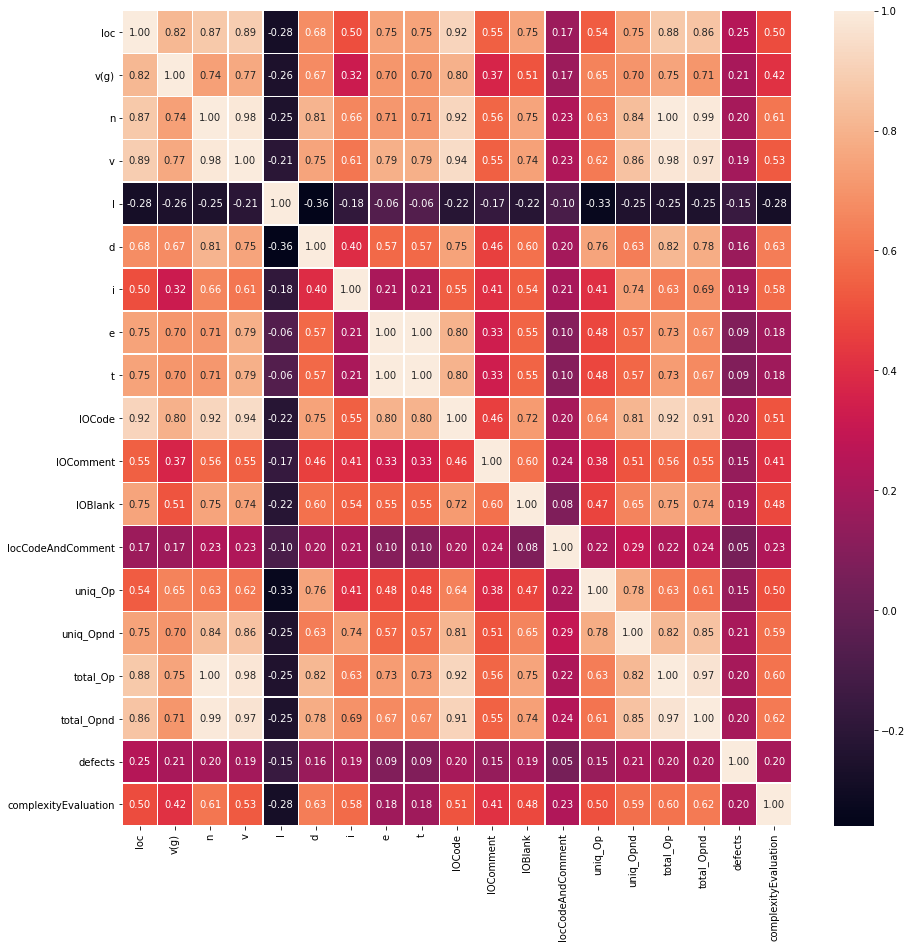

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [ ]:
data.isnull().sum()

loc                     0
v(g)                    0
n                       0
v                       0
l                       0
d                       0
i                       0
e                       0
t                       0
lOCode                  0
lOComment               0
lOBlank                 0
locCodeAndComment       0
uniq_Op                 0
uniq_Opnd               0
total_Op                0
total_Opnd              0
defects                 0
complexityEvaluation    0
dtype: int64

In [ ]:
data.groupby("complexityEvaluation").size()

complexityEvaluation
0    10452
1     2035
dtype: int64

### feature selection

In [25]:
X = pd.DataFrame(data.drop(['defects'],axis=1))
Y = data['defects']
Y = pd.DataFrame(Y)


### Sampling
Sampling is a method that allows us to get information about the population based on the statistics from a subset of the population (sample), without having to investigate every individual.
* a sample is a part of population
----
<b> Imbalanced Class Distribution</b> , generally happens when observations in one of the classes are much higher or lower than any other classes.As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution

-----
<b>Some methods to solve these issues are </b>
  * Random Over-sampling :<br>
It aims to balance class distribution by randomly increasing minority class examples by replicating them.<br>

* SMOTE (Synthetic Minority Oversampling Technique) <br>synthesises new minority instances between existing minority instances. It randomly picks up the minority class and calculates the K-nearest neighbour for that particular point. Finally, the synthetic points are added between the neighbours and the chosen spot.

* Random Under-Sampling: <br>
It aims to balance class distribution by randomly eliminating majority class



In [26]:
#now we resample, and from that we take training and validation sets
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=12, ratio = 1.0)
x,y = sm.fit_sample(X,Y)
y = pd.DataFrame(y, columns=['defects'])
x= pd.DataFrame(x, columns=X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20516 entries, 0 to 20515
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   20516 non-null  float64
 1   v(g)                  20516 non-null  float64
 2   n                     20516 non-null  float64
 3   v                     20516 non-null  float64
 4   l                     20516 non-null  float64
 5   d                     20516 non-null  float64
 6   i                     20516 non-null  float64
 7   e                     20516 non-null  float64
 8   t                     20516 non-null  float64
 9   lOCode                20516 non-null  float64
 10  lOComment             20516 non-null  float64
 11  lOBlank               20516 non-null  float64
 12  locCodeAndComment     20516 non-null  float64
 13  uniq_Op               20516 non-null  float64
 14  uniq_Opnd             20516 non-null  float64
 15  total_Op           

In [ ]:
y

,defects
0,False
1,True
2,False
3,False
4,False
...,...
20511,True
20512,True
20513,True
20514,True


### Preprocessing data

In [28]:
x1 = x.values # converting dataframes to numpy
y1= y.values

In [29]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Dimensionality reduction

there are three popular dimensionality reduction techniques that are used. 

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA), and
  3. Kernel PCA (KPCA)
  ----
  The PCA and LDA are applied in dimensionality reduction when we have a linear problem in hand that means there is a linear relationship between input and output variables. On the other hand, the Kernel PCA is applied when we have a nonlinear problem in hand that means there is a nonlinear relationship between input and output variables


In [31]:
len(X_train[0])

18

In [32]:
# Applying Dimensionality reduction


from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [33]:
len(X_train[0])  # 18 features to 6 features

6

In [34]:
X_train.shape

(15387, 6)

In [ ]:

#from sklearn.decomposition import KernelPCA
#kpca = KernelPCA(n_components = 6, kernel = 'rbf')
#X_train = kpca.fit_transform(X_train)
#X_test = kpca.transform(X_test)


### Defining and training models

In [35]:
def NN(X_train, y_train):

    X_train= pd.DataFrame(X_train)
    y_train= pd.DataFrame(y_train)   
    # Importing the Keras libraries and packages
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    
    model= Sequential([
    Dense(1000, activation='relu', input_shape=(6)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])


    # Compiling the ANN
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Fitting the ANN to the Training set
    model.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)
    
    
    
    return model

In [36]:
def knn(x_train,y_train):
  
  from sklearn.neighbors import KNeighborsClassifier
  neigh = KNeighborsClassifier
  clf = neigh(n_neighbors = 10)
  clf.fit(X_train, y_train)
  return clf

In [38]:
#Creation of Naive Bayes model
def naive_bayes(x_train, y_train): 
  from sklearn.naive_bayes import GaussianNB
  model = GaussianNB()
  model.fit(X_train, y_train)
  return model


In [39]:
def decision_tree(x_train, y_train):
  from sklearn import tree
  model = tree.DecisionTreeClassifier()
  model.fit(X_train, y_train)
  return model

In [40]:
def random_forest(x_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
    clf.fit(x_train, y_train)
    return clf

In [41]:
def svm ( x_train,y_train):
    from sklearn.svm import SVC
    clf = SVC(gamma='auto')
    clf.fit(x_train, y_train)
    return clf

In [42]:
def cnn(x_train,y_train):
    from keras.models import Sequential
    from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D    

    
    #img_rows, img_cols = 1,6
    
    #x_train1 = x_train_matrix.reshape(x_train.shape[0], img_rows, img_cols, 1)
    #x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], img_rows, img_cols, 1)
    #input_shape = (img_rows, img_cols, 1)

    model = Sequential()
    #add model layers
    model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=(None,6,)))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(Conv2D(16, kernel_size=1, activation='relu'))
    
    
#   model.add(MaxPool2D(pool_size=(1,8)))
    #model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    #train the model
    model.fit(x_train, y_train, epochs=40)    
    #y_pred = model.predict(x_val1)>0.5
    #y_pred_df = pd.DataFrame(y_pred)
    
    return model  

In [43]:
from keras.models import *
from keras.layers import *

def lstm(x_train, y_train):
  
  model = Sequential()

  model.add(LSTM(
          input_dim=6,
          units=100,
          return_sequences=True))
  model.add(Dropout(0.2))

  model.add(LSTM(
            units=50,
            return_sequences=False))
  model.add(Dropout(0.2))

  model.add(Dense(units=2, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(x_train,y_train)
  return model

### Training model

In [44]:
knn = knn(X_train,y_train)
nb = naive_bayes(X_train,y_train)
dt = decision_tree(X_train,y_train)
rf = random_forest(X_train,y_train)
svm= svm(X_train,y_train)


### Performance Check

In [45]:

from sklearn.metrics import *

def performance(model):

  

  print(model)
  print("\n----------------------------------------------\n")

  y_pred_on_test = model.predict(X_test)

  #print('Accuracy:',accuracy_score(y_test,y_pred_on_test))
  print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
  print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
  print('f1_score:', f1_score(y_test,y_pred_on_test))
  print('Precision:', precision_score(y_test,y_pred_on_test))
  print('Recall:', recall_score(y_test, y_pred_on_test))
  print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))

  print("\n========================================\n\n")

In [46]:
for i in [knn,nb,dt,rf, svm]:
  performance(i)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

----------------------------------------------

Accuracy: 0.7315120473701322
Avg Precision: 0.6735484284488111
f1_score: 0.733913043478261
Precision: 0.7349071207430341
Recall: 0.7329216518718642
ROC_AUC: 0.7315120473701322



GaussianNB(priors=None, var_smoothing=1e-09)

----------------------------------------------

Accuracy: 0.5668469902027964
Avg Precision: 0.5500992070763587
f1_score: 0.37416107382550334
Precision: 0.6791878172588832
Recall: 0.2582014666152065
ROC_AUC: 0.5668469902027964



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                

### Extracting software features

In [47]:
pip install radon

     |████████████████████████████████| 61kB 4.3MB/s 


#### Using radon programmatically

##### Radon's API is composed of layers:
<b> 1. Bottom layer </b>
  * have Visitors 
  * build an AST out of your code and get the basic metrics
  * two available visitors: ComplexityVisitor and HalsteadVisitor

  <b>2. at a higher level</b>:you have helper functions residing in separate modules<br>
  * radon.complexity (chiefly cc_rank, cc_visit, cc_visit_ast and sorted_results) for cyclomatic complexityb 
  * radon.metrics (mainly h_visit, h_visit_ast, mi_rank, mi_visit) for halstead metrics and mi index
  * analyze inside the radon.raw module for SLOC, LLOC, LOC, &c.
  *  get back an object (Module object )<bR>
  
<b> 3. at the highest level </b>you have the Harvesters. A Harvester implements all the business logic of the CLI.
  * To use a Harvester, you simply create a radon.cli.Config object

In [48]:
 features = [ "LOC","cyclomatic complexity", "Lenght n","Volume v","Program lenght l","Difficulty d","Intelligence i","Efforts e", "Time t","IOCODE", "IOCOmment","IOBlank","IOCodeAndComment","uniq op","uniq opnd","total op","total Opnd","evaluation" ]

In [49]:
def helper(n,v,d,e,t):    
    evaluation = (n < 300) & (v < 1000 ) & (d < 50) & (e < 500000) & (t < 5000)
    
    return 0 if evaluation == True else 1 

In [50]:
pwd

'/content/Bug-Prediction-dataset'

In [51]:
cd ..

/content


In [53]:
ls

Bug-Prediction-dataset/  f1.py  f2.py  f3.py  sample_data/


<i><b> Here I upload two files f1.py,f2.py in the current directory  for testing </b></i>

In [55]:
from radon.raw import analyze
from radon.metrics import *
from radon.complexity import cc_visit
from radon.cli.tools import iter_filenames

module_features=[]


file_name = []
# iter through filenames starting from the current directory
# you can pass ignore or exclude patterns here (as strings)
# for example: ignore='tests,docs'
for filename in iter_filenames(['.']):
    with open(filename) as fobj:
        source = fobj.read()
    #printing code
    #print(source)

    file_name.append(filename)

    # get cc blocks
    
    # get MI score
    #mi = mi_visit(source, True)
    # get raw metrics

    # Module(loc=13, lloc=5, sloc=4, comments=1, multi=5, blank=3, single_comments=1)
    raw = analyze(source)

    f1 = raw.loc #1
    f13 = raw.sloc #IOCODE
    f14 = raw.comments # IOComment
    f15 = raw.blank #IOBlank
    f16 = raw.lloc #IOcode and Comment


    #Halstead features
    ast = h_visit(source)
    hal = ast.total
    #Halstead(total=HalsteadReport(h1=1, h2=4, N1=2, N2=4, vocabulary=5, length=6, calculated_length=8.0, volume=13.931568569324174, difficulty=0.5, effort=6.965784284662087, time=0.3869880158145604, bugs=0.004643856189774725), functions=[])

    f17 = hal.h1 #Uniq op
    f18 = hal.h2 #uniq operands
    f19 = hal.N1 #toal operators
    f20 = hal.N2 #total operands

    f5 = hal.length #n
    f6 = hal.volume #v

    f7 = f6/f5 #l --> program length
    f8 = hal.difficulty
    f9 = f7*f6
    f10 = hal.effort
    f12 = hal.time

    #cc
    cc = cc_visit(source)

    try:f2 = cc[-1].complexity
    except: f2 = 0
    f21 = helper(f5,f6,f8,f10,f12)
    

    f = [f1,f2,f5,f6,f7,f8,f9,f10,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21]

    #f3,f4, f11,f21 missing --> essential complexity , design complexity , b, branch count
    
    print("\n-------------------------------------------\n")
    print(filename,end="\n")
    for i,j in zip(features,f):
      print(str(i)+ " "+ str(j),end="\n")
   
    print("\n############################################\n")

    
    module_features.append(f)    



    # Now do what you want with the data


-------------------------------------------

f2.py
LOC 15
cyclomatic complexity 3
Lenght n 15
Volume v 53.77443751081735
Program lenght l 3.5849625007211565
Difficulty d 3.5714285714285716
Intelligence i 192.77934197365332
Efforts e 192.0515625386334
Time t 10.6695312521463
IOCODE 5
IOCOmment 1
IOBlank 4
IOCodeAndComment 7
uniq op 5
uniq opnd 7
total op 5
total Opnd 10
evaluation 0

############################################


-------------------------------------------

f3.py
LOC 1902
cyclomatic complexity 1838
Lenght n 5184
Volume v 60943.82612276526
Program lenght l 11.75613929837293
Difficulty d 1.5
Intelligence i 716464.1092750474
Efforts e 91415.7391841479
Time t 5078.652176897105
IOCODE 1881
IOCOmment 2
IOBlank 14
IOCodeAndComment 1936
uniq op 3
uniq opnd 3456
total op 1728
total Opnd 3456
evaluation 1

############################################


-------------------------------------------

f1.py
LOC 13
cyclomatic complexity 0
Lenght n 6
Volume v 13.931568569324174
Program

In [56]:
module_features

[[15,
  3,
  15,
  53.77443751081735,
  3.5849625007211565,
  3.5714285714285716,
  192.77934197365332,
  192.0515625386334,
  10.6695312521463,
  5,
  1,
  4,
  7,
  5,
  7,
  5,
  10,
  0],
 [1902,
  1838,
  5184,
  60943.82612276526,
  11.75613929837293,
  1.5,
  716464.1092750474,
  91415.7391841479,
  5078.652176897105,
  1881,
  2,
  14,
  1936,
  3,
  3456,
  1728,
  3456,
  1],
 [13,
  0,
  6,
  13.931568569324174,
  2.321928094887362,
  0.5,
  32.34810046696353,
  6.965784284662087,
  0.3869880158145604,
  4,
  1,
  3,
  5,
  1,
  4,
  2,
  4,
  0]]

In [ ]:
len(module_features[0])

18

In [57]:
file_name

['f2.py', 'f3.py', 'f1.py']

In [62]:
def predict( list1, file_name,model=rf):
    # Feature Scaling
  from sklearn.preprocessing import StandardScaler
  
  list1 = np.array(list1)
  list1 = sc.transform(list1)

  #x_test = sc.transform(list) 

  X_test = pca.transform(list1)

  prediction = model.predict(X_test)
  for p,f in zip(prediction,file_name):
    if p== 0:
      print("\n",f, "  is Non buggy\n")
    else:
      print(f," is More likely to be buggy. Needs recheck ")

    #print("\nProbability values are :  \n",rf.predict_proba(X_test))









In [63]:
predict(module_features,file_name)


 f2.py   is Non buggy

f3.py  is More likely to be buggy. Needs recheck 

 f1.py   is Non buggy

